<a href="https://colab.research.google.com/github/Osgil/Data_analyst/blob/main/Analysis_of_variance_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Была обновлена кнопка заказа, и часть юзеров видела старый вариант, а часть – новый. С помощью стат. тестов проверим, есть ли значимые различия между контрольной и тестовой группой

In [17]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/5_task_2.csv')

In [3]:
df.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [4]:
df.isna().sum()

id         0
group      0
segment    0
events     0
dtype: int64

In [5]:
df.shape

(100000, 4)

Визуализируем распределение events по тестовой и контрольной группе с помощью seaborn

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


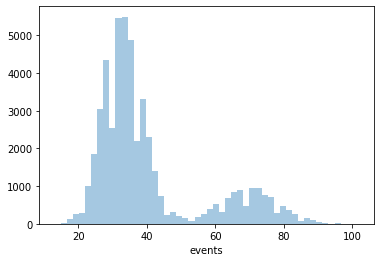

In [6]:
sns.distplot(df.query("group == 'test'").events, kde=False) # распределение тестовой группы не назовешь нормальным...

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


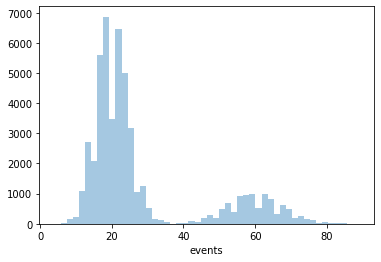

In [7]:
sns.distplot(df.query("group == 'control'").events, kde=False) # для контрольной группе это замечание также актуально

Посчитаем описательные статистики в разрезе групп и сегментов

In [8]:
df.groupby(['group', 'segment']).events.describe().T # Замечу, что показатели среднего,
                                                     # минимального и максимального значения,
                                                     # "лучше" в тестовой группе

group         control                        test              
segment          high           low          high           low
count    10000.000000  40000.000000  10000.000000  40000.000000
mean        59.970800     20.031575     69.938500     33.025925
std          7.805347      4.473576      8.403974      5.720845
min         31.000000      4.000000     40.000000     13.000000
25%         55.000000     17.000000     64.000000     29.000000
50%         60.000000     20.000000     70.000000     33.000000
75%         65.000000     23.000000     76.000000     37.000000
max         89.000000     41.000000    102.000000     59.000000

Импортируем модуль statsmodels и проведем многофакторный дисперсионный анализ

In [9]:
model = smf.ols('events ~ segment + group + segment:group', df).fit() # строим модель

In [10]:
anova = sm.stats.anova_lm(model, typ=2) # все факторы и их взаимодействие значимы

,sum_sq,df,F,PR(>F)
segment,2.362480e+07,1.0,689756.377484,0.000000e+00
group,3.837195e+06,1.0,112031.864119,0.000000e+00
segment:group,3.664244e+04,1.0,1069.823273,2.060261e-233
Residual,3.424956e+06,99996.0,NaN,NaN


In [11]:
df['combination'] = df['group'] + '\\' + df['segment'] # создал колонку группировки по группе\сегменту

In [12]:
df.head()

,id,group,segment,events,combination
0,83440,test,high,78.0,test\high
1,96723,test,high,71.0,test\high
2,68719,test,high,80.0,test\high
3,50399,test,high,80.0,test\high
4,95613,test,high,78.0,test\high


In [13]:
sm.stats.multicomp.pairwise_tukeyhsd(df.events, groups=df.combination).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
control\high,control\low,-39.9392,0.001,-40.1073,-39.7711,True
control\high,test\high,9.9677,0.001,9.7551,10.1803,True
control\high,test\low,-26.9449,0.001,-27.113,-26.7768,True
control\low,test\high,49.9069,0.001,49.7388,50.075,True
control\low,test\low,12.9944,0.001,12.888,13.1007,True
test\high,test\low,-36.9126,0.001,-37.0807,-36.7445,True


В тестовой группе в обоих сегментах статистчески значимо увеличился показатель events, по сравнению с контрольной группой.

Визуализируем полученные с помощью anova результаты

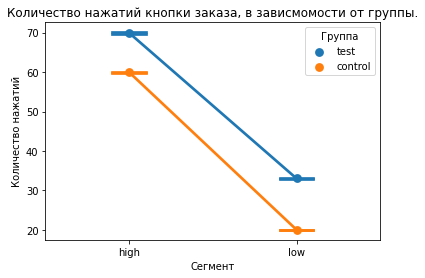

In [19]:
sns.pointplot(x = 'segment', y = 'events', hue = 'group', data = df, capsize = .2)
plt.title('Количество нажатий кнопки заказа, в зависмомости от группы.')
plt.xlabel('Сегмент')
plt.ylabel('Количество нажатий')
plt.legend(title = 'Группа')

Как видно на на графике, значимые эффект оказывает как сегмент, так и группа.